<a href="https://colab.research.google.com/github/Lanaanvar/Image-Filtering/blob/main/average_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
from math import log10
from skimage.metrics import peak_signal_noise_ratio

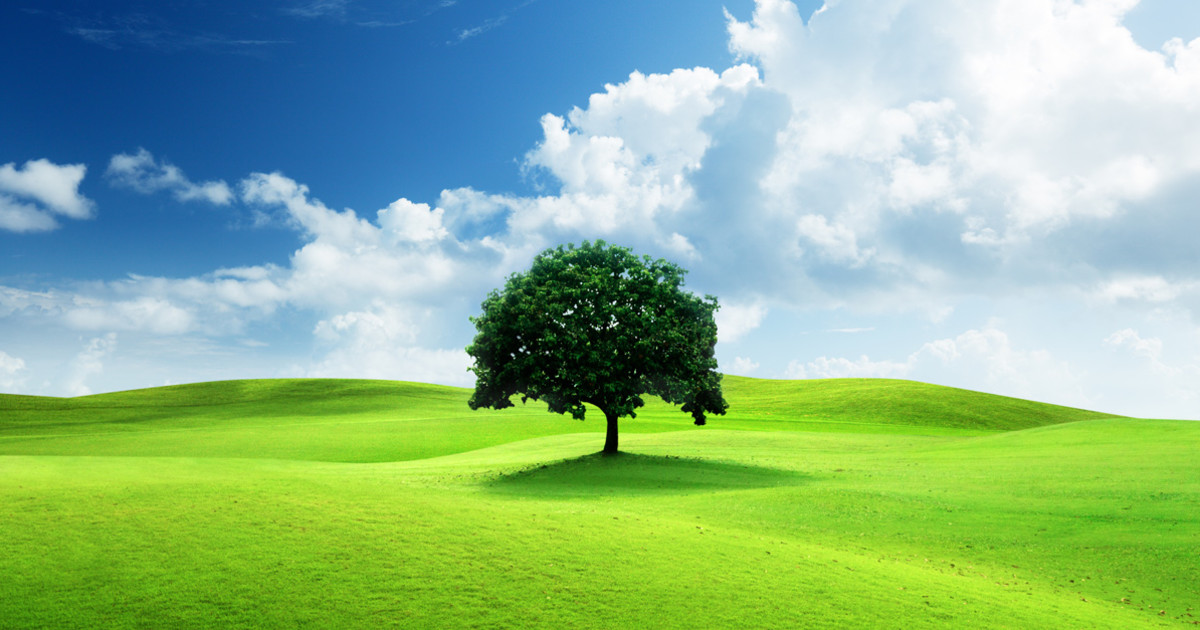

In [15]:
image = cv2.imread("/content/drive/MyDrive/IMAGE FILTERING/free-nature-images.jpg")
if image is None:
  print("Error...")

else:
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

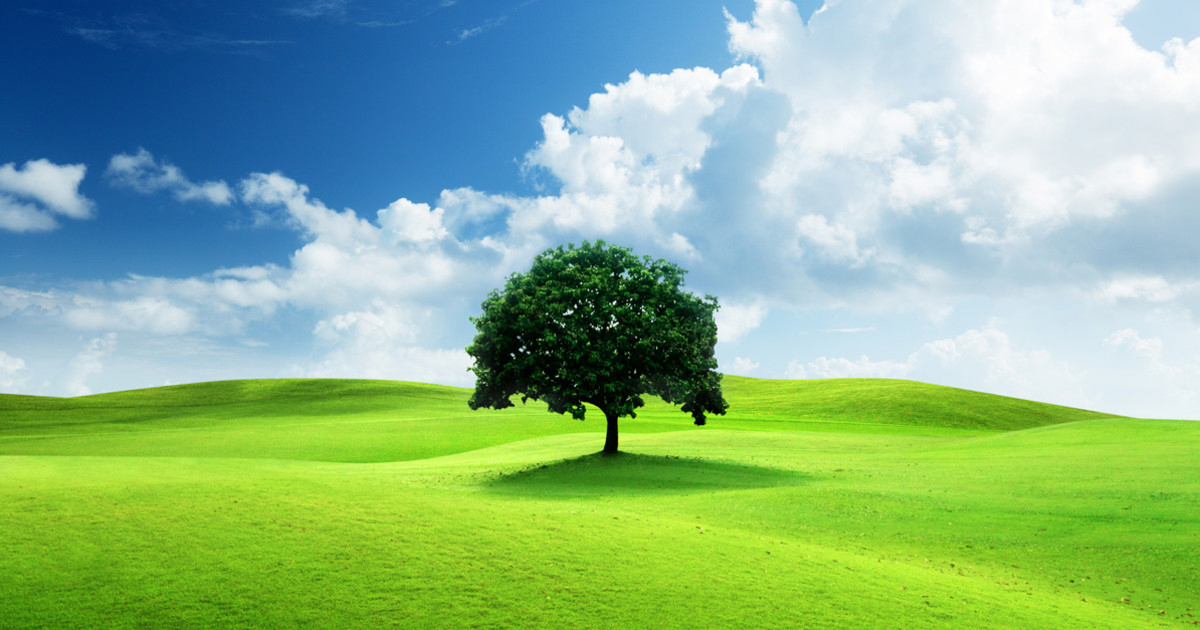

In [16]:
mean=0
std_dev=0.1

noise=np.random.normal(mean, std_dev, image.shape).astype("float32")
noisy_image=image+ 0.2*noise
noisy_image=np.clip(noisy_image, 0, 255)
cv2_imshow(noisy_image)

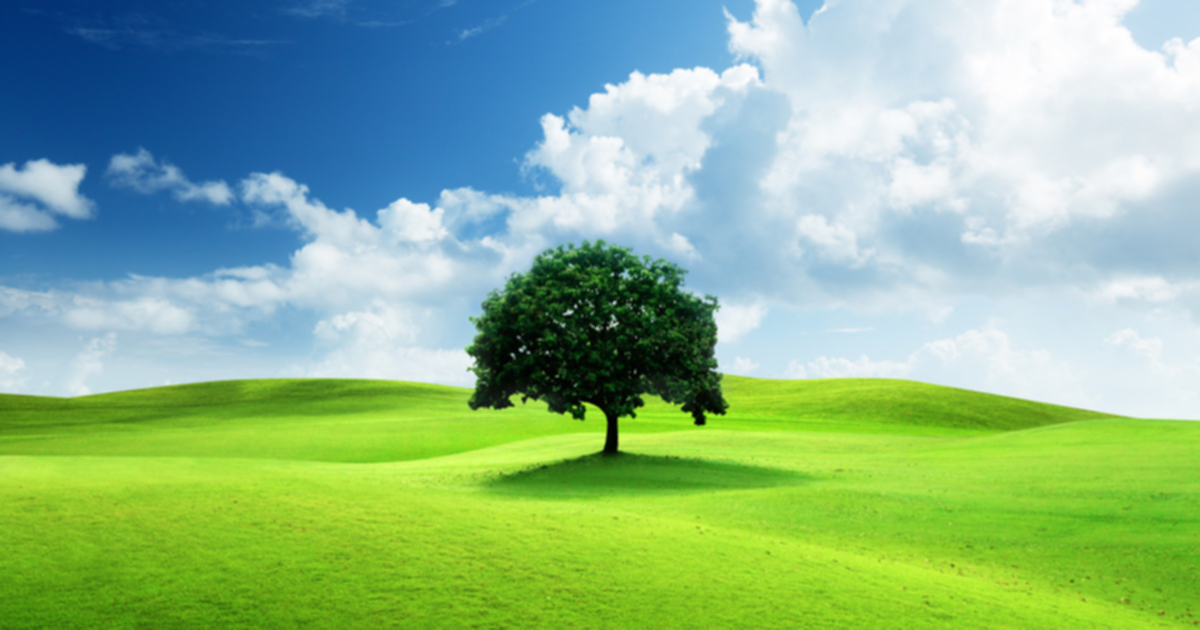

In [17]:
kernel = np.ones((3,3), np.float32)/9
filtered_image=cv2.filter2D(image, -1, kernel)
cv2_imshow(filtered_image)

In [18]:
def psnr(image1, image2):
  mse=np.mean((image1-image2)**2)
  if mse == 0:
    return float('inf')

  max_pixel = 255.0
  psnr= 20 * log10(max_pixel/np.sqrt(mse))
  return psnr

In [19]:
psnr_value1 = psnr(image, noisy_image)
print('PSNR between original and noisy image:', psnr_value1, 'dB')

psnr_value2 = psnr(noisy_image, filtered_image)
print('PSNR between noisy and filtered image:', psnr_value2, 'dB')

psnr_value3 = psnr(image, filtered_image)
print('PSNR between image and filtered image:', psnr_value3, 'dB')

PSNR between original and noisy image: 82.1197481108502 dB
PSNR between noisy and filtered image: 35.98789405241843 dB
PSNR between image and filtered image: 38.0785230066969 dB
